# Введение в PyTorch

## PyTorch



PyTorch — это один из самых популярных на сегодняшний день фреймворков для глубокого обучения. "Популярный" в том плане, что на сегодняшний день большая часть кода, связанная с нейросетями, пишется на PyTorch. Таким популярным этот фреймворк сделало то, что с PyTorch очень удобно работать. Как мы увидим далее, работа с PyTorch очень похожа на работу с Numpy. Также у PyTorch очень удобные и информативные [документация](https://pytorch.org/docs/stable/index.html) и [туториалы](https://pytorch.org/tutorials/).

Небольшой экскурс по фреймворкам для глубокого обучения:

- **Caffee, Theano, Lasagne** — уже практически не используются;
- **Tensorflow** — фреймворк от Google, который был популярен до 2017-2018 года перед появлением PyTorch. В то время большинство кода, связанного с нейросетями, писалась на нем. Однако он был довольно сложен, поэтому PyTorch быстро перехватил лидерство.

    У Tensorflow есть также "обертка" Keras, которая позволяет более просто работать с нейросетями. Однако Keras менее гибок, чем PyTorch, поэтому не может полноценно его заменить.

    Также в 2019 году вышел Tensorflow 2.0, в котором работа с нейросетями была сильно упрощена. Но к тому моменту рынок уже захватил PyTorch, поэтому Tensorflow 2.0 популярен так и не стал.

- **PyTorch**;
- **JAX** — новый фреймворк от Google, призванный заменить Tensorflow.

### torch.Tensor

Базовой единицей фреймворка является структура, которая называется `torch.Tensor`. Tensor - это аналог `numpy.array`, многие методы работы с `torch.Tensor` в точности повторяют методы `numpy array`.

Тензор — это тот тип данных, с которыми работают все нейросети в PyTorch. Матрицы весов слоев сети — это тензоры. Данные, которые мы подаем на вход сети тоже обязательно должны быть приведены к типу `torch.Tensor`. Ну и выход сети, разумеется, тоже будет иметь тип `torch.Tensor`.

Импортируем библиотеку и рассмотрим типичные способы создания тензоров.

In [1]:
import torch

In [2]:
print(torch.__version__)

1.11.0


1. Тензоры можно создавать из листов, массивов и других контейнеров Python.

In [3]:
x_list = [1., 2., 3.]
x_tensor = torch.tensor(x_list)
x_tensor

tensor([1., 2., 3.])

2. Тензоры можно создавать при помощи инициализирующих функций, как в `numpy`.

In [4]:
# тензор из нулей заданного размера
zeros_tensor = torch.zeros(2, 3)
zeros_tensor

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [5]:
# тензор из единиц заданного размера
ones_tensor = torch.ones(2, 3)
ones_tensor

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [6]:
# тензор — единичная матрица заданного размера
eye_tensor = torch.eye(6)
eye_tensor

tensor([[1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1.]])

3. Вообще практически все методы, которые есть у Numpy массивов, есть и у torch.Tensor. С тензорами также можно производить операции:

In [7]:
x_tensor = torch.tensor([
    [1, 2],
    [3, 4]
])

y_tensor = torch.tensor([
    [-10, 3],
    [5, -4]
])

In [8]:
x_tensor + y_tensor

tensor([[-9,  5],
        [ 8,  0]])

In [9]:
# матричное умножение
x_tensor @ y_tensor

tensor([[  0,  -5],
        [-10,  -7]])

In [10]:
# аналог np.concatenate([x_tensor, y_tensor], axis=1)
torch.cat([x_tensor, y_tensor], dim=0)

tensor([[  1,   2],
        [  3,   4],
        [-10,   3],
        [  5,  -4]])

In [11]:
# аналог np.concatenate([x_tensor, y_tensor], axis=1)
torch.cat([x_tensor, y_tensor], dim=0).size()

torch.Size([4, 2])

4. Тензоры можно переводить обратно в формат Numpy или питоновских значений

In [12]:
x_tensor = torch.tensor([
    [1, 2],
    [3, 4]
])

x_numpy = x_tensor.numpy()
x_numpy

array([[1, 2],
       [3, 4]])

In [13]:
# многомерный тензор
x_tensor = torch.tensor([
    [1, 2],
    [3, 4]
])

x_tensor.tolist()

[[1, 2], [3, 4]]

In [14]:
# одномерный тензор
x_tensor = torch.tensor([3])

x_tensor.item()

3

In [15]:
# одномерный тензор
x_tensor = torch.tensor([2])

x_tensor.item()

2

## Нейронная сеть на Pytorch

Давайте научимся создавать полносвязную нейросеть на Pytorch.

Нейронные сети в Pytorch создаются по типу конструктора: есть набор стандартных блоков из которых мы можем собрать итоговую модель. Простейшие из этих блоков — линейные слои и функции активации.



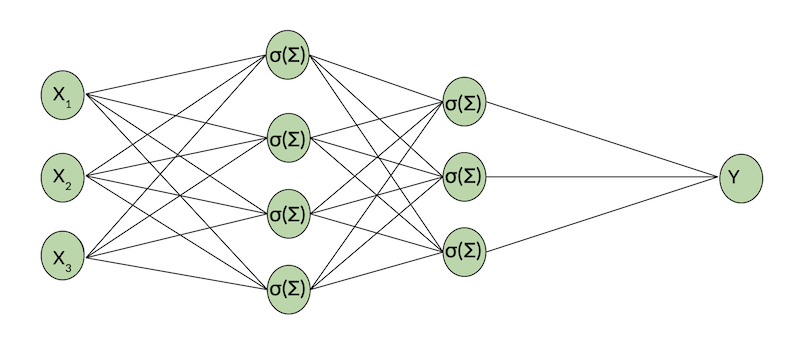

Слой, представляющий из себя линейное преобразование задаётся при помощи класса `torch.nn.Linear`. Давайте создадим слой с 5 входными и 3 выходными нейронами.

In [16]:
# модуль, в котором определены все классы слоев сетей и функций активации
import torch.nn as nn

n = 5
m = 3
# аргумент bias принимает значения True и False и определяет, будет ли в слое
# применяться bias. Если bias=False, вектор байеса равен нулю
linear_layer = nn.Linear(n, m, bias=True)

In [17]:
linear_layer

Linear(in_features=5, out_features=3, bias=True)

In [18]:
# Видим что у нас матрица весов 3 на 5. 
## Также requires_grad=True, так как торч определяет это для дальнейшего расчета производных

linear_layer.weight

Parameter containing:
tensor([[-0.4437, -0.0835, -0.1693, -0.1131,  0.4256],
        [-0.0583, -0.4365, -0.1202, -0.1574, -0.0275],
        [-0.2256,  0.0718,  0.3299,  0.3604,  0.3535]], requires_grad=True)

In [19]:
# Видим что у нас вектор баиса равен 1 на 3. Так как выходной слой из 3
## Также requires_grad=True, так как торч определяет это для дальнейшего расчета производных

linear_layer.bias

Parameter containing:
tensor([ 0.2988, -0.2435,  0.3857], requires_grad=True)

Далее — функция активации. Многие известные функции активации реализованы в модуле `nn` и продублированы в модуле `nn.functional`. Выберем какую-нибудь из них, например, гиперболический тангенс (tanh).

In [20]:
# Можно использовать такой вариант:

# import torch.nn.functional as F
# activation = F.tanh

# или такой вариант:
activation = nn.Tanh()

In [21]:
x_tensor = torch.tensor([
    [1, 2],
    [3, 4]
])
activation(x_tensor)

tensor([[0.7616, 0.9640],
        [0.9951, 0.9993]])

Теперь проход некоторого тензора с данными через такой полносвязный слой будет задан при помощи последовательности команд:

In [22]:
random_input = torch.rand(5)

x = linear_layer(random_input)
output = activation(x)
output

tensor([-0.0195, -0.6772,  0.6528], grad_fn=<TanhBackward0>)

Обратим внимание на `grad_fn=<TanhBackward0>`. Такая приписка будет появляться на всех тензорах, которые являются обучающими параметрами в нейросети. Это значит, что для данного тензора в процессе обучения сети будет вычисляться градиент, с помощью которого значения тензора будут обновляться.

Отлично, мы научились использовать отдельные слои из PyTorch. Давайте теперь на их основе соберем полносвязную нейросеть.

### Полносвязная нейросеть для бинарной классификации

Зададим датасет для бинарной классификации точек на плоскости:

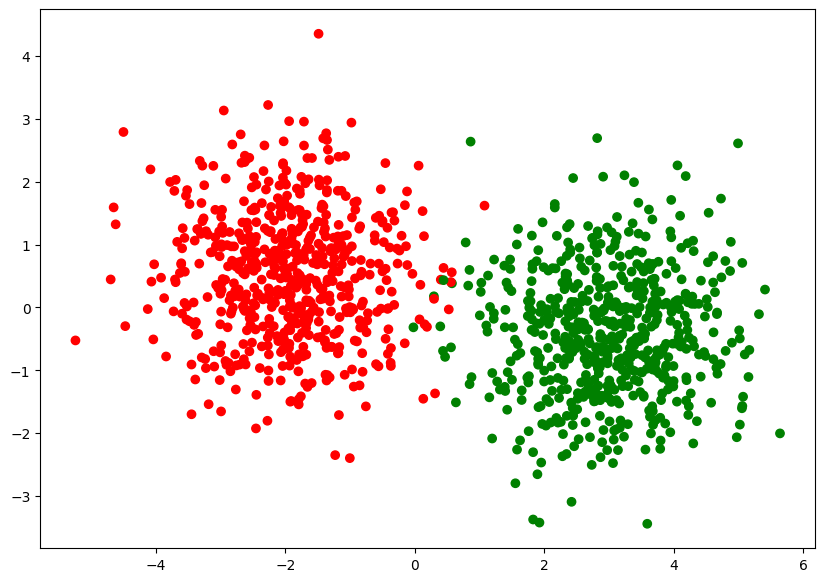

In [23]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# генерируем 1200 точек, распределенных вокруг двух центров: (-2,0.5) и (3,-0.5)
X, y = make_blobs(n_samples=1200, centers=[[-2,0.5],[3,-0.5]], cluster_std=1, random_state=42)

# отрисовываем точки на плоскости, покрасив их в два цвета в зависимости от класса
colors = ("red", "green")
colored_y = np.zeros(y.size, dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[y.ravel() == cl] = str(colors[i])

plt.figure(figsize=(10,7))
plt.scatter(X[:, 0], X[:, 1], c=colored_y)
plt.show()

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=200)

In [25]:
X_train

array([[ 3.06447441, -2.47546657],
       [-2.59239392, -0.36399077],
       [ 3.26712665,  0.00872502],
       ...,
       [ 2.58653484, -0.23971949],
       [ 2.35403582, -1.29919201],
       [ 3.76608028,  0.72693322]])

In [26]:
y_train

array([1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,

Давайте зададим нейронную сеть с двумя слоями. Пусть в скрытых слоях будет пять нейронов. В качестве функции активации выберем сигмоиду.

Нейросеть задается в виде класса, который наследуется от абстрактного класса Module. Для задания нейросети достаточно определить у класса методы `__init__ `и `__forward__`. В методе `__init__ ` обычно прописываются слои и артибуты сети, а в `__forward__` — то, как нейросеть будет обрабатывать данные, поданные ей на вход.

In [27]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.fc1 = nn.Linear(2, 2)
        self.act1 = nn.Sigmoid() # можно заменить на nn.Tanh / nn.ReLU / ...

        self.fc2 = nn.Linear(2, 1)
        self.act2 = nn.Sigmoid()


    def forward(self, x):
        """
        params:
            x (torch.Tensor): данные, поданные на вход сети
        """

        x = self.fc1(x)
        x = self.act1(x)

        x = self.fc2(x)
        x = self.act2(x)
        return x

Заведем нейросеть:

In [28]:
model = Net()

Посмотрим, что умеет наша необученная нейросеть. Получим ее ответы на тестовой выборке и визуализируем, к какому классу наша нейросеть отнесла какие точки тестовой выборки.

In [29]:
nn_prediction = model(torch.FloatTensor(X_test))

nn_prediction = nn_prediction.tolist()

In [30]:
nn_prediction

[[0.35712990164756775],
 [0.3456975221633911],
 [0.34403184056282043],
 [0.3507857620716095],
 [0.3535415232181549],
 [0.34453916549682617],
 [0.31969839334487915],
 [0.3392649292945862],
 [0.3438507616519928],
 [0.362496942281723],
 [0.39000311493873596],
 [0.35366326570510864],
 [0.3107852637767792],
 [0.3435222804546356],
 [0.323256254196167],
 [0.3300744295120239],
 [0.36780762672424316],
 [0.3501134216785431],
 [0.3462379574775696],
 [0.3343944251537323],
 [0.37600085139274597],
 [0.35543757677078247],
 [0.36032634973526],
 [0.36369821429252625],
 [0.34863826632499695],
 [0.349191278219223],
 [0.366839200258255],
 [0.3560158610343933],
 [0.34742820262908936],
 [0.35566624999046326],
 [0.37691619992256165],
 [0.3610304594039917],
 [0.3483818471431732],
 [0.34593722224235535],
 [0.3636518120765686],
 [0.3596358895301819],
 [0.3470492959022522],
 [0.3438602387905121],
 [0.3217456638813019],
 [0.3811759054660797],
 [0.33616021275520325],
 [0.34688374400138855],
 [0.336056649684906],
 

Переведем предсказания сети из вероятностей в формат нулей и единиц:

In [31]:
nn_prediction = np.array([int(x[0] > 0.5) for x in nn_prediction])

In [32]:
nn_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

Визуализируем точки тестовой выборки и покрасим их в цвета в зависимости от того, к какому классу сеть отнесла эти точки:

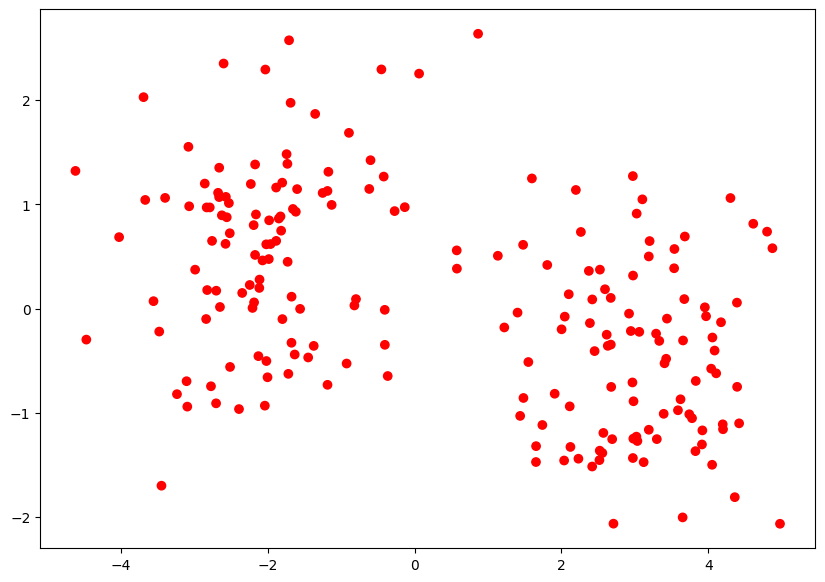

In [33]:
colors = ("red", "green")
colored_y = np.zeros(len(nn_prediction), dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[nn_prediction.ravel() == cl] = str(colors[i])

plt.figure(figsize=(10,7))
plt.scatter(X_test[:, 0], X_test[:, 1], c=colored_y)
plt.show()

Полученный результат ожидаем, поскольку наша нейронная сеть не обучена. Давайте обучим её.


### Обучение нейронной сети в Pytorch

В одном из прошлых знаятий для обучения самописной логрегрессии нам нужно было реализовывать внутри класса логрегрессии методы для вычисления градиента лосс-функции по весам модели и обновления весов этой модели.

При написании класса сети в PyTorch нам ну нужно самостоятельно реализовывать вычисление производных и код обновления весов. Внутри PyTorch алгоритм вычисления частных производных лосс-функции по весам сети реализован с помощью модуля [autograd](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html). На основе строения функции сети, заданной в forward, autograd понимает, как выглядит граф вычислений сети, и при вызове метода backward у последнего элемента графа (лосс-функции), проходит по графу в обратном направлении, вычисляя все градиенты.

Более подробно про то, как autograd вычисляет градиенты весов сети, вы найдете в дополнительных материалах к этому модулю.

А мы перейдем к написанию функции `train` для обучения нашей нейронной сети.

**В обучении сети участвуют следующие сущности:**
- сама нейросеть
- лосс-функция
- оптимизатор (optimizer)

**Что такое оптимизатор:**

Оптимизатор — это сущность, которая отвечает за обновление параметров сети на основе их текущих значений и значений их производных. То есть, в алгоритме стохастического спуска оптимизатор отвечает за строчку, обведенную красным:

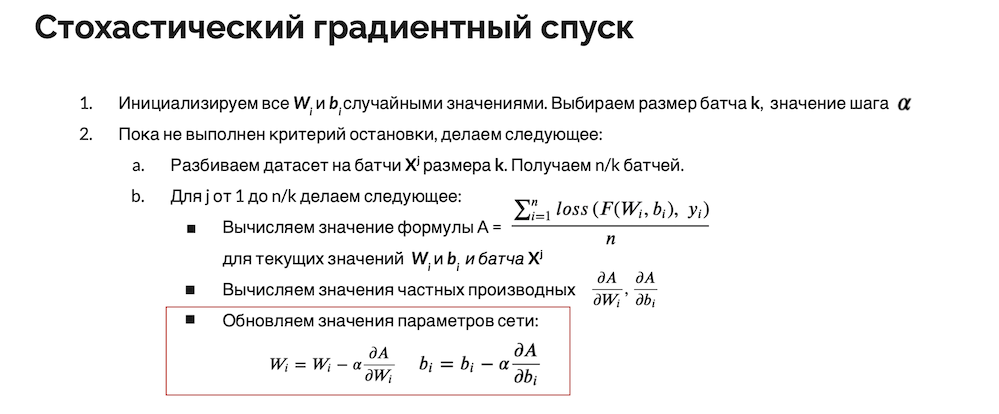

При вызове метода .backward() лосс-функции для всех весов сети вычисляются производные. После этого оптимизатор обновляет все веса сети с помощью этих вычисленных производных.

Тут может возникнуть вопрос: зачем нужна отдельная сущность "оптимизатор" для такой простой операции обновления весов? Казалось бы, всего-то нужно для каждого параметра сети отнять от его старого значения значение его производной, умноженной на learning rate. Почему бы не делать это сразу во время backward, во время того, как autograd вычисляет производные?

Ответ тут такой: существуют разные алгоритмы обновления весов сети, т.е. разные алгоритмы оптимизации весов. Стохастический градиентный спуск — это базовый, самый простой вариант. К нему можно добавить некоторые трюки, которые сделают обучение сети еще эффективнее. И чтобы можно было обучать одну и ту же сеть с помощью разных алгоритмов оптимизации, за алгоритм оптимизации отвечает отдельная сущность — optimizer.


Итак, теперь мы готовы реализовать функцию обучения сети. Реализуем для начала обычный градиентный спуск:

In [34]:
import tqdm
from tqdm.auto import tqdm

def train(model, X, y, criterion, optimizer, num_epoch):
    '''
    args:
        model - модель нейронной сети
        X и y - обучающая выборка
        criterion - функция потерь, взятая из модуля `torch.nn`
        optimizer - оптимизатор, взятый из модуля `torch.optim`
        num_epoch - количество эпох обучения.
    '''
    # цикл по количеству эпох обучения
    for t in tqdm(range(num_epoch)):
        # Вычислим предсказания нашей модели
        y_pred = model(X)

        # Посчитаем значение функции потерь  на полученном предсказании
        loss = criterion(y_pred, y)

        # Выполним подсчёт новых градиентов
        loss.backward()
        # Выполним шаг градиентного спуска
        optimizer.step()
        # Обнулим сохраненные у оптимизатора значения градиентов
        # перед следующим шагом обучения
        optimizer.zero_grad()

    return model

Снова объявим нашу сеть:

In [35]:
model = Net()

Объявим лосс-функцию и оптимизатор, и обучим сеть на 30 эпохах:

In [36]:
model.parameters

<bound method Module.parameters of Net(
  (fc1): Linear(in_features=2, out_features=2, bias=True)
  (act1): Sigmoid()
  (fc2): Linear(in_features=2, out_features=1, bias=True)
  (act2): Sigmoid()
)>

In [37]:
# лосс-функция — бинарная кросс-энтропия (aka LogLoss)
criterion = torch.nn.BCELoss()
# оптимизатор — SGD (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
# optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [38]:
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train).view(-1, 1) # size [1000] -> [1000, 1]

model = train(model, X_train, y_train, criterion, optimizer, 150)

  0%|          | 0/150 [00:00<?, ?it/s]

Посмотрим теперь, каков будет результат.

In [39]:
with torch.no_grad():
    nn_prediction = model(torch.FloatTensor(X_test))
    nn_prediction = nn_prediction.tolist()

nn_prediction = np.array([int(x[0] > 0.5) for x in nn_prediction])

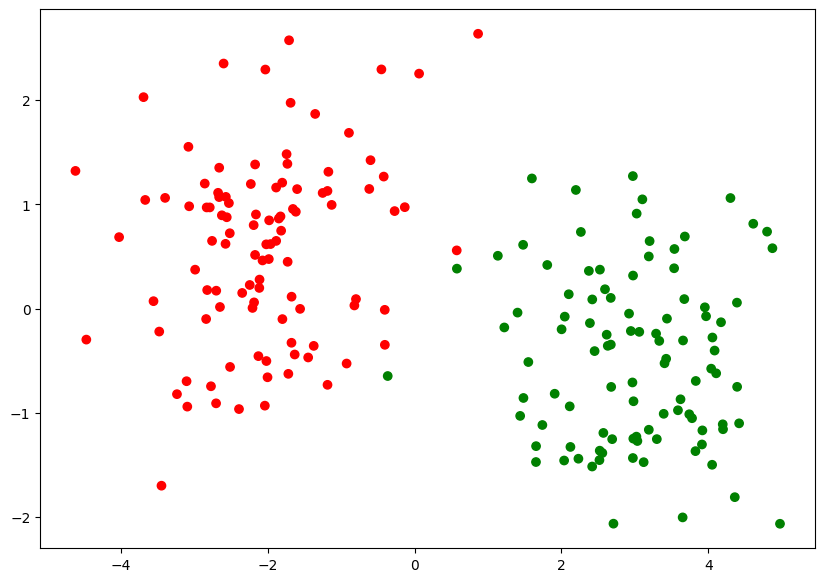

In [40]:
colors = ("red", "green")
colored_y = np.zeros(len(nn_prediction), dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[nn_prediction.ravel() == cl] = str(colors[i])

plt.figure(figsize=(10,7))
plt.scatter(X_test[:, 0], X_test[:, 1], c=colored_y)
plt.show()

Покрасим все точки плоскости в цвета в зависимости от того, в какой класс наша сеть отнесла бы эти точки. Так мы лучше увидим разделяющую поверхность:

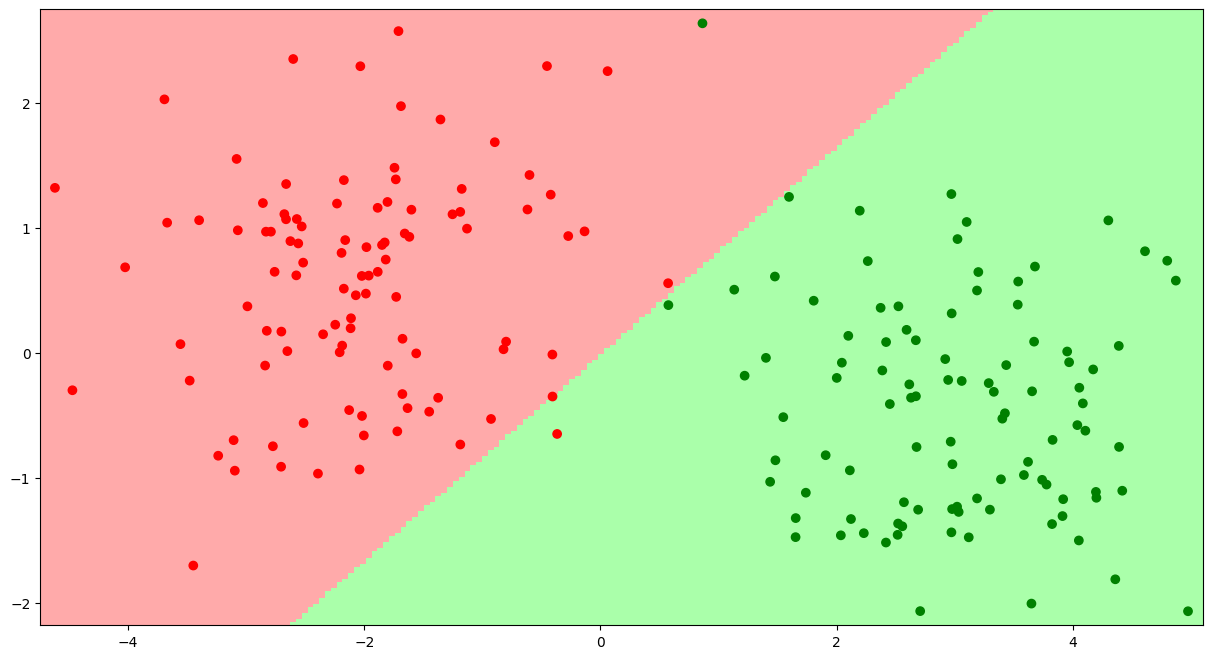

In [41]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(15,8))

eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.min(X_test[:,0]) - eps, np.max(X_test[:,0]) + eps, 200),
                     np.linspace(np.min(X_test[:,1]) - eps, np.max(X_test[:,1]) + eps, 200))
Z = model(torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape).detach().numpy()
Z = (Z>0.5).astype(int)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

colored_y = np.zeros(y_test.size, dtype=str)
for i, cl in enumerate([0,1]):
    colored_y[y_test.ravel() == cl] = str(colors[i])

plt.scatter(X_test[:, 0], X_test[:, 1], c=colored_y)
plt.show()

### Dataloader и обучение по мини-батчам

В домашнем задании по логрегрессии мы сами писали функцию generate_batches, которая выполняла функционал разделения данных на мини-батчи для подачи в сеть. В PyTorch нам такого самим писать не нужно, тут уже есть специальный класс Dataloader. Давайте заведем даталоадеры для тренировочных и тестовых данных.

Даталоадер принимает на вход данные в виде массива пар [($x_1$, $y_1$), ..., ($x_i$, $y_i$), ...]

In [42]:
train_loader = torch.utils.data.DataLoader(list(zip(X_train, y_train)), batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(list(zip(X_test, y_test)), batch_size=64, shuffle=False)

Здесь:
- batch_size — размер батча, на которые даталоадер будет делить данные перед каждой эпохой;
- shuffle — если True, то перед каждой эпохой и делением на батчи данные будут перемешаны. Shuffle обычно ставится True для обучающих данных, и False для тестовых.

Нам нужно также немного изменить функцию обучения сети, чтобы реализовать обучение по мини-батчам:

In [43]:
import tqdm
from tqdm.auto import tqdm

def train_stochastic(model, loader, criterion, optimizer, num_epoch):
    '''
    args:
        model - модель нейронной сети
        X и y - обучающая выборка
        criterion - функция потерь, взятая из модуля `torch.nn`
        optimizer - оптимизатор, взятый из модуля `torch.optim`
        num_epoch - количество эпох обучения.
    '''
    # цикл по количеству эпох обучения
    for t in tqdm(range(num_epoch)):
        epoch_loss = []

        # цикл по батчам даталоадера
        for X_batch, y_batch in loader:
            # Вычислим предсказания нашей модели
            y_pred = model(X_batch)

            # Посчитаем значение функции потерь  на полученном предсказании
            loss = criterion(y_pred, y_batch)
            epoch_loss.append(loss.item())

            # Выполним подсчёт новых градиентов
            loss.backward()
            # Выполним шаг градиентного спуска
            optimizer.step()
            # Обнулим сохраненные у оптимизатора значения градиентов
            # перед следующим шагом обучения
            optimizer.zero_grad()

        print("curr_loss", np.mean(epoch_loss))

    return model

Снова заведем сеть, лосс-функцию, оптимизатор, и начнем обучение:

In [44]:
model = Net()

# лосс-функция — бинарная кросс-энтропия (aka LogLoss)
criterion = torch.nn.BCELoss()
# оптимизатор — SGD (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
# optimizer = torch.optim.Adam(NN.parameters(), lr=1e-4)

In [45]:
model = train_stochastic(model, train_loader, criterion, optimizer, 350)

  0%|          | 0/350 [00:00<?, ?it/s]

curr_loss 0.6007994562387466
curr_loss 0.5999395810067654
curr_loss 0.5993458069860935
curr_loss 0.5984404385089874
curr_loss 0.5983612090349197
curr_loss 0.5975395776331425
curr_loss 0.5967079289257526
curr_loss 0.5961630418896675
curr_loss 0.595581840723753
curr_loss 0.5948383919894695
curr_loss 0.5947410203516483
curr_loss 0.5937958396971226
curr_loss 0.5934158861637115
curr_loss 0.5928815566003323
curr_loss 0.5920998156070709
curr_loss 0.5915831886231899
curr_loss 0.5909326709806919
curr_loss 0.5904872305691242
curr_loss 0.5896081179380417
curr_loss 0.5893089026212692
curr_loss 0.5886051058769226
curr_loss 0.5879637822508812
curr_loss 0.5869607366621494
curr_loss 0.5866944491863251
curr_loss 0.5859009213745594
curr_loss 0.5854501463472843
curr_loss 0.5845717005431652
curr_loss 0.5835902392864227
curr_loss 0.5835093334317207
curr_loss 0.5828613303601742
curr_loss 0.5820925943553448
curr_loss 0.5815847218036652
curr_loss 0.5810443833470345
curr_loss 0.5801921337842941
curr_loss 0.579

curr_loss 0.4093116894364357
curr_loss 0.40857734717428684
curr_loss 0.40805529430508614
curr_loss 0.4078406784683466
curr_loss 0.40684750489890575
curr_loss 0.40703338384628296
curr_loss 0.4063051585108042
curr_loss 0.404977522790432
curr_loss 0.40435378812253475
curr_loss 0.403949236497283
curr_loss 0.4031386487185955
curr_loss 0.40320971235632896
curr_loss 0.40238682366907597
curr_loss 0.40172783099114895
curr_loss 0.40215616673231125
curr_loss 0.4004492126405239
curr_loss 0.39973895996809006
curr_loss 0.3996675107628107
curr_loss 0.39904831163585186
curr_loss 0.3983822800219059
curr_loss 0.3979734852910042
curr_loss 0.39733232744038105
curr_loss 0.396424762904644
curr_loss 0.3965663779526949
curr_loss 0.3952639475464821
curr_loss 0.3954131230711937
curr_loss 0.39465430192649364
curr_loss 0.39372602105140686
curr_loss 0.39265530556440353
curr_loss 0.3921359684318304
curr_loss 0.39272029884159565
curr_loss 0.3916108403354883
curr_loss 0.39102253690361977
curr_loss 0.3902081996202469


Посмотрим, как теперь наша модель делит плоскость на части по классам:

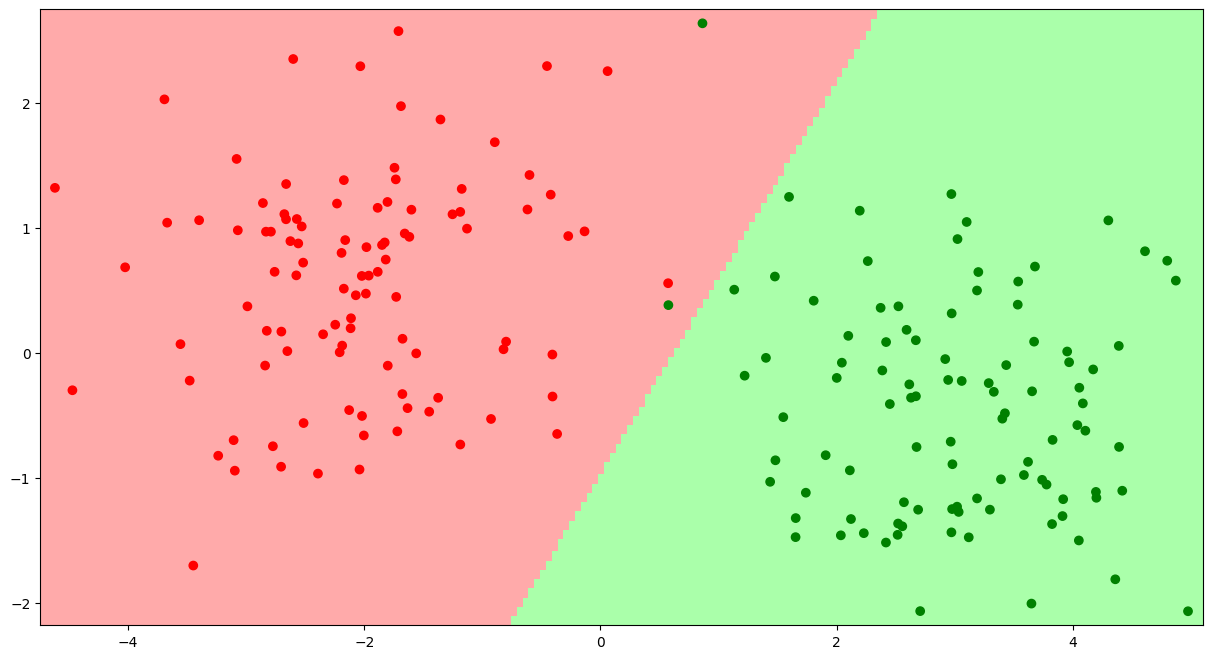

In [46]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(15,8))

eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.min(X_test[:,0]) - eps, np.max(X_test[:,0]) + eps, 200),
                     np.linspace(np.min(X_test[:,1]) - eps, np.max(X_test[:,1]) + eps, 200))

Z = model(torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()]))

Z = Z.reshape(xx.shape).detach().numpy()
Z = (Z>0.5).astype(int)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

colored_y = np.zeros(y_test.size, dtype=str)
for i, cl in enumerate([0,1]):
    colored_y[y_test.ravel() == cl] = str(colors[i])

plt.scatter(X_test[:, 0], X_test[:, 1], c=colored_y)
plt.show()

## nn.Sequential

Давайте еще раз посмотрим на то, как мы задавали нашу нейросеть:

In [47]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.fc1 = nn.Linear(2, 2)
        self.act1 = nn.Sigmoid()

        self.fc2 = nn.Linear(2, 1)
        self.act2 = nn.Sigmoid()


    def forward(self, x):

        x = self.fc1(x)
        x = self.act1(x)

        x = self.fc2(x)
        x = self.act2(x)
        return x

В PyTorch есть еще один способ задания структуры нейросети, через nn.Sequential. Выглядит это так:

In [48]:
model = nn.Sequential(
                   nn.Linear(2, 2, bias=True),
                   nn.Sigmoid(),
                   nn.Linear(2, 1, bias=True),
                   nn.Sigmoid()
                   )

Теперь с переменной model можно обращаться точно так же, как мы делали это выше. Эту сеть можно обучить и получать ответы на тестовых данных.



Этот способ создания сети выглядит проще (не нужно писать никакой класс и никакой forward), но он менее гибок. Дело в том, что, используя nn.Sequential, мы задаем только слои сети, и выполняться они будут при вызове сети ровно в том порядке, в котором мы их задали. Отсюда и название структуры Sequential — "последовательный". В случае же описания сети в виде класса мы могли в forward определять вид прохождения входа по сети сами. Например, могли бы сделать такую нейросеть:

In [49]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.fc11 = nn.Linear(2, 2)
        self.act11 = nn.Sigmoid()

        self.fc12 = nn.Linear(2, 2)
        self.act12 = nn.Sigmoid()

        self.fc2 = nn.Linear(4, 1)
        self.act2 = nn.Sigmoid()


    def forward(self, x1, x2):

        x1 = self.fc11(x1)
        x1 = self.act11(x1)

        x2 = self.fc12(x2)
        x2 = self.act12(x2)

        x = torch.cat([x1, x2], dim=1)

        x = self.fc2(x)
        x = self.act2(x)
        return x

Или можно даже делать так:

In [50]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.fc11 = nn.Linear(2, 2)
        self.act11 = nn.Sigmoid()

        self.fc12 = nn.Linear(2, 2)
        self.act12 = nn.Sigmoid()

        self.fc2 = nn.Linear(2, 1)
        self.act2 = nn.Sigmoid()


    def forward(self, x, mode='left'):

        if mode == 'left':
            x = self.fc11(x)
            x = self.act11(x)

        elif mode == 'right':
            x = self.fc12(x2)
            x = self.act12(x2)

        x = self.fc2(x)
        x = self.act2(x)
        return x

Таким образом, при задании сети в виде класса у нас ест бОльшая гибкость в определении того, как сеть будет обрабатывать входные данные на каждой новой итерации.


Но, несмотря на это, nn.Sequential все-таки используется при создании сетей. Он часто используется внутри метода __init__, чтобы сгруппировать несколько слоев сети в блок. Например, вот так:

In [51]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.left_block = nn.Sequential(
            nn.Linear(2, 2),
            nn.Sigmoid()
        )

        self.right_block = nn.Sequential(
            nn.Linear(2, 2),
            nn.Sigmoid()
        )

        self.bottom_block = nn.Sequential(
            nn.Linear(2, 2),
            nn.Sigmoid()
        )


    def forward(self, x, mode='left'):

        if mode == 'left':
            x = self.left_block(x)

        elif mode == 'right':
            x = self.right_block(x)

        x = self.bottom_block(x)
        return x

Это становится особенно удобно при написании глубоких сетей, у которых много слоев. Мы еще увидим, как это используется, на примере глубоких сверточных сетей в 4 модуле курса.

## Полезные ссылки

- [Datasets & Dataloaders](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html) (PyTorch docs)
- [Torch.autograd](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html) (PyTorch docs)